# **Single Variable Linear Regression**

- 정의 : sample data를 가장  잘 설명할 수 있는 W, b를 찾는 기계학습 모델을 구현한다.
- f(x) : wx + b, ex) w = 0.2, b = 1
- loss_function : Mean Squared Error 1/n * sum((f(x) - y)^2)
- gradient 함수 : 중앙차분, loss_function(w+h) - loss_function(w-h) / (2*h)
- gradient_update : w = w - learning_rate * dE/dw

In [18]:
import numpy as np

In [19]:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0]).reshape(5,1)
y_data = np.array([2.0, 3.0, 4.0, 5.0, 6.0]).reshape(5,1)

In [20]:
import matplotlib.pyplot as plt

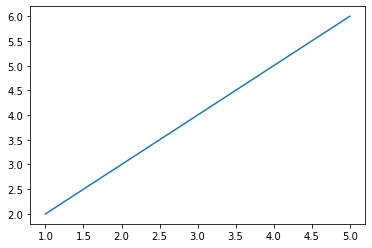

In [21]:
plt.plot(x_data, y_data)

In [22]:
weights = np.random.rand(1,1)
bias = np.random.rand(1)

In [23]:
print(weights, bias)

[[0.74374627]] [0.66498936]


In [24]:
def func1(x, weights, bias):
    return x*weights + bias

In [25]:
func1(x_data[0], weights, bias)

array([[1.40873563]])

In [26]:
func1(x_data, weights, bias)

array([[1.40873563],
       [2.15248189],
       [2.89622816],
       [3.63997443],
       [4.38372069]])

In [27]:
f = func1

In [28]:
def loss_function(f, weights, bias, input_data, target):
    f = f(input_data, weights, bias)

    MSE = (1/len(input_data)) * sum((f - target)**2)
    return MSE

In [29]:
loss = loss_function

In [30]:
def gradient_func(f, weights, bias, loss, input_data, target):
    h = 10e-5
    # if grad_name == 'weights':
    #     diff = (loss(f,weights+h, bias, input_data, target) - loss(f,weights+h, bias, input_data, target)) / (2*h)
    # else:
    #     diff = (loss(f,weights, bias+h, input_data, target) - loss(f,weights, bias+h, input_data, target)) / (2*h)

    w_forward = loss(f,weights+h, bias, input_data, target)
    w_backward = loss(f,weights-h, bias, input_data, target)
    grad_w = (w_forward - w_backward) / (2*h)

    b_forward = loss(f,weights, bias+h, input_data, target)
    b_backward = loss(f,weights, bias-h, input_data, target)
    grad_b = (b_forward - b_backward) / (2*h)

    return grad_w, grad_b

In [31]:
dw, db = gradient_func(f, weights, bias, loss, x_data, y_data)

In [32]:
def gradient_update(weights, bias, learning_rate, dw, db):
    w = weights - learning_rate * dw
    b = bias - learning_rate * db
    return w, b

In [33]:
gradient_update(weights, bias, 0.0001, dw, db)

(array([[0.74451103]]), array([0.66521012]))

In [34]:
f = func1
loss = loss_function

for i in range(1000):
    print("weights : ", weights, "bias : ", bias)
    grad_w, grad_b = gradient_func(f, weights, bias, loss, x_data, y_data)
    weights, bias = gradient_update(weights, bias, 0.0001, grad_w, grad_b)


weights :  [[0.74374627]] bias :  [0.66498936]
weights :  [[0.74451103]] bias :  [0.66521012]
weights :  [[0.74527398]] bias :  [0.66543037]
weights :  [[0.74603512]] bias :  [0.66565012]
weights :  [[0.74679445]] bias :  [0.66586936]
weights :  [[0.74755198]] bias :  [0.66608811]
weights :  [[0.74830772]] bias :  [0.66630637]
weights :  [[0.74906166]] bias :  [0.66652412]
weights :  [[0.7498138]] bias :  [0.66674138]
weights :  [[0.75056417]] bias :  [0.66695814]
weights :  [[0.75131275]] bias :  [0.66717441]
weights :  [[0.75205956]] bias :  [0.66739019]
weights :  [[0.7528046]] bias :  [0.66760547]
weights :  [[0.75354786]] bias :  [0.66782027]
weights :  [[0.75428937]] bias :  [0.66803458]
weights :  [[0.75502911]] bias :  [0.6682484]
weights :  [[0.75576709]] bias :  [0.66846173]
weights :  [[0.75650333]] bias :  [0.66867458]
weights :  [[0.75723782]] bias :  [0.66888694]
weights :  [[0.75797056]] bias :  [0.66909882]
weights :  [[0.75870157]] bias :  [0.66931022]
weights :  [[0.7